In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Read in the data
df = pd.read_csv('/workspaces/Datathon2023/dataset/SPD_Crime_Data__2008-Present.csv')

#Get the unique values from the offense type column
df['Offense Parent Group'].unique()

array(['DRUG/NARCOTIC OFFENSES', 'LARCENY-THEFT', 'ROBBERY',
       'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'FRAUD OFFENSES',
       'KIDNAPPING/ABDUCTION', 'COUNTERFEITING/FORGERY',
       'PORNOGRAPHY/OBSCENE MATERIAL', 'EXTORTION/BLACKMAIL',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSES', 'STOLEN PROPERTY OFFENSES',
       'EMBEZZLEMENT', 'WEAPON LAW VIOLATIONS', 'ARSON',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATIONS', 'BAD CHECKS',
       'PROSTITUTION OFFENSES', 'FAMILY OFFENSES, NONVIOLENT',
       'CURFEW/LOITERING/VAGRANCY VIOLATIONS', 'ANIMAL CRUELTY',
       'HOMICIDE OFFENSES', 'PEEPING TOM', 'DRUNKENNESS',
       'SEX OFFENSES, CONSENSUAL', 'BRIBERY', 'GAMBLING OFFENSES',
       'TRESPASS OF REAL PROPERTY', 'ASSAULT OFFENSES',
       'BURGLARY/BREAKING&ENTERING'], dtype=object)

<ipython-input-4-c68a61403512>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4['year'] < 2008][df4['counts'] > 0].plot(x='year', y='counts', kind='bar', title='Number of Crimes per Year Before 2008 (Start Time)')


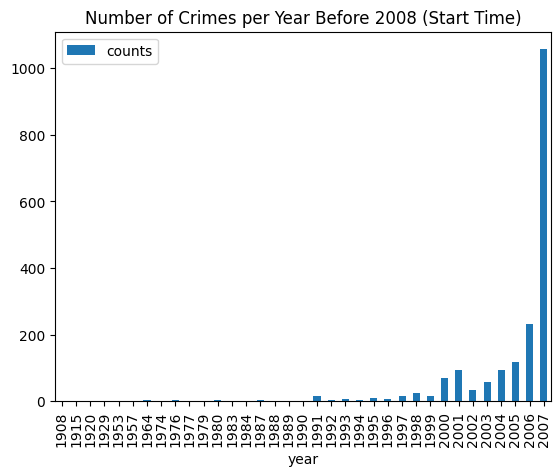

In [4]:
report_datetime = pd.to_datetime(df['Report DateTime'], format='%m/%d/%Y %H:%M:%S %p')
date_time = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %H:%M:%S %p')
df['start_date_time'] = date_time
df = df.set_index('start_date_time')
df3 = df.groupby([pd.Grouper(freq='M'), 'Offense Parent Group']).size().reset_index(name='counts')
df['report_date_time'] = report_datetime
df2 = df.groupby([pd.Grouper(freq='M'), 'Offense Parent Group', 'report_date_time']).size().reset_index(name='counts')



#get number of crimes per year
df4 = df.groupby([pd.Grouper(freq='Y')]).size().reset_index(name='counts')
df4['year'] = df4['start_date_time'].dt.year
df4 = df4.drop(columns=['start_date_time'])

#plot number of crimes per year before 2008. Only plot the year if the number of crimes is greater than 0
df4[df4['year'] < 2008][df4['counts'] > 0].plot(x='year', y='counts', kind='bar', title='Number of Crimes per Year Before 2008 (Start Time)')
plt.show()

In [5]:
#drop all rows before 2008 and make a new column that has the differnce between the report date and the offense start date
df2 = df2[df2['start_date_time'] >= '2008-01-01']
df2['time_diff'] = df2['report_date_time'] - df2['start_date_time']

#print the statistics for the time difference
print(df2['time_diff'].describe())

print(len(df2))

count      0
mean     NaT
std      NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: time_diff, dtype: object
0


In [6]:
df3 = df3[df3['start_date_time'] >= '2008-01-01']
print(df3)

     start_date_time        Offense Parent Group  counts
547       2008-01-31                       ARSON       3
548       2008-01-31            ASSAULT OFFENSES     614
549       2008-01-31                  BAD CHECKS      47
550       2008-01-31                     BRIBERY       1
551       2008-01-31  BURGLARY/BREAKING&ENTERING     510
...              ...                         ...     ...
5317      2023-02-28                     ROBBERY      51
5318      2023-02-28                SEX OFFENSES      20
5319      2023-02-28    STOLEN PROPERTY OFFENSES      26
5320      2023-02-28   TRESPASS OF REAL PROPERTY      66
5321      2023-02-28       WEAPON LAW VIOLATIONS      26

[4775 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


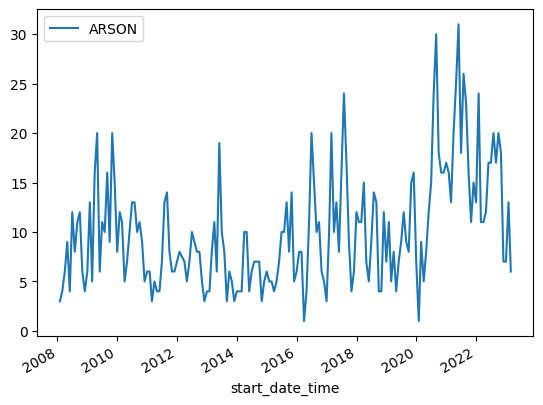

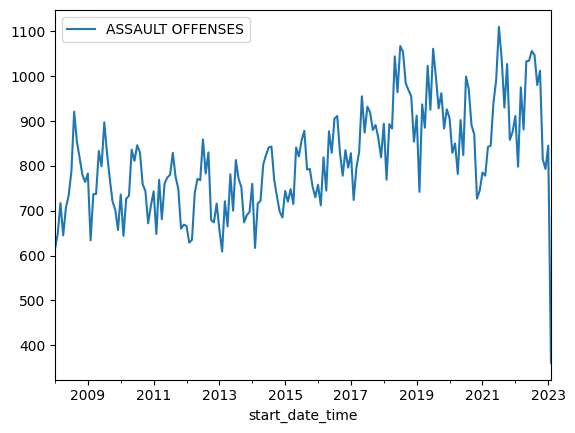

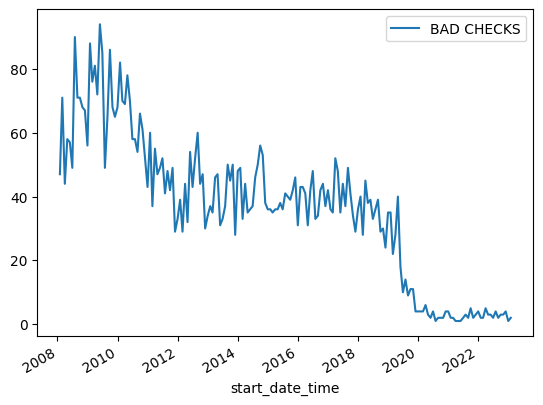

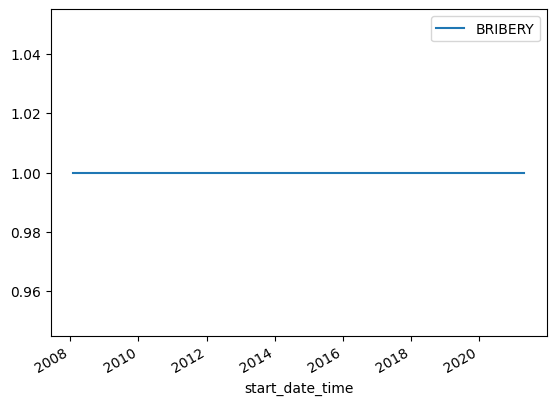

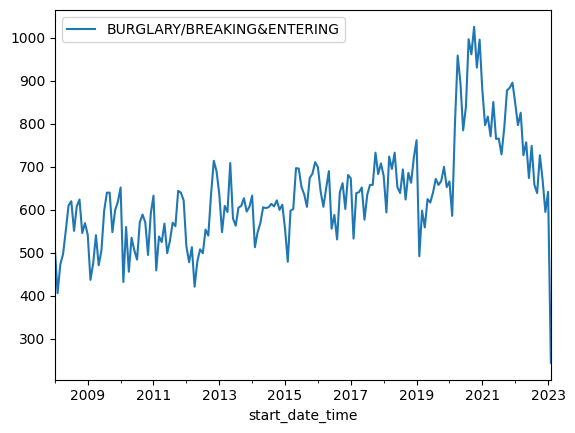

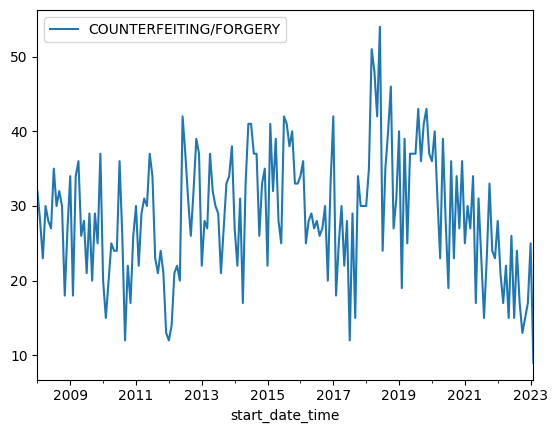

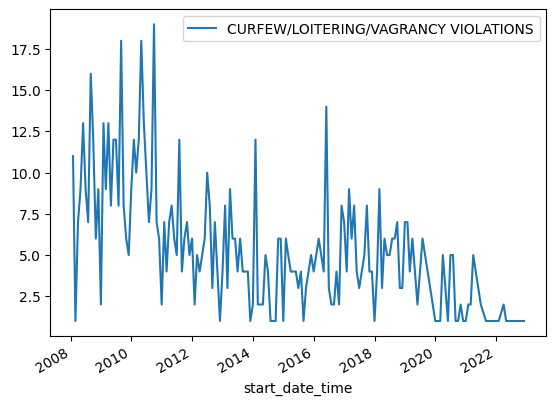

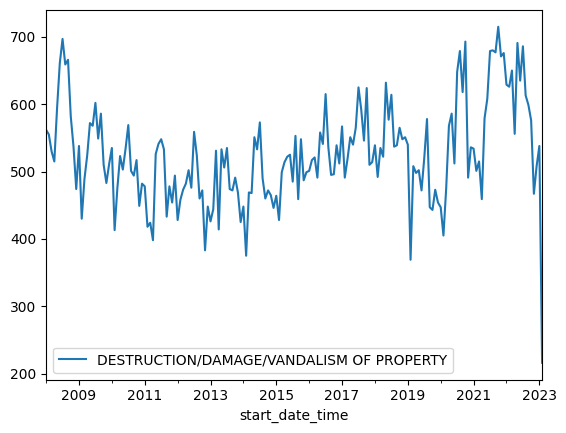

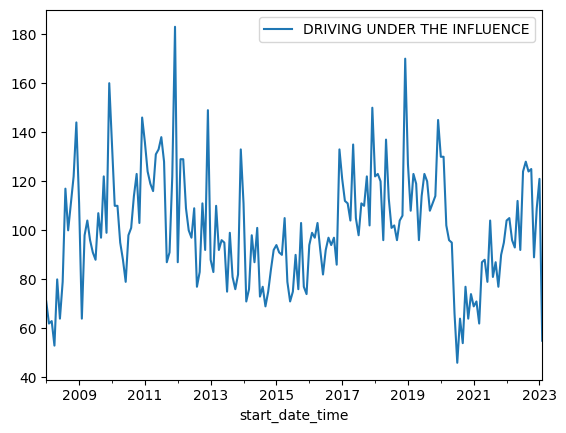

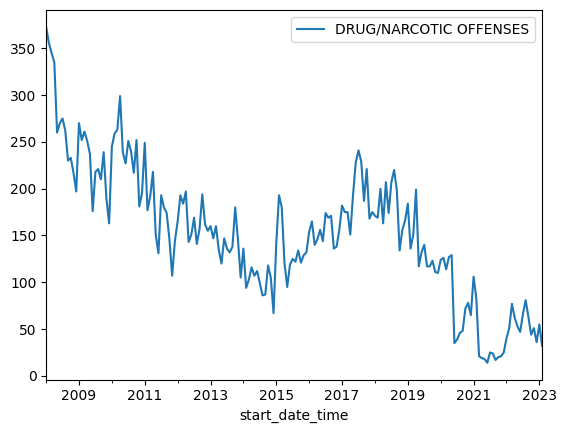

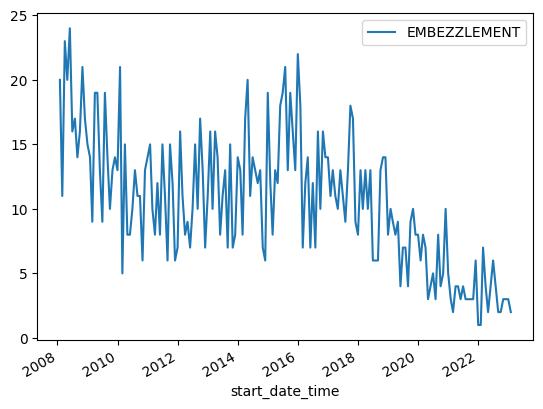

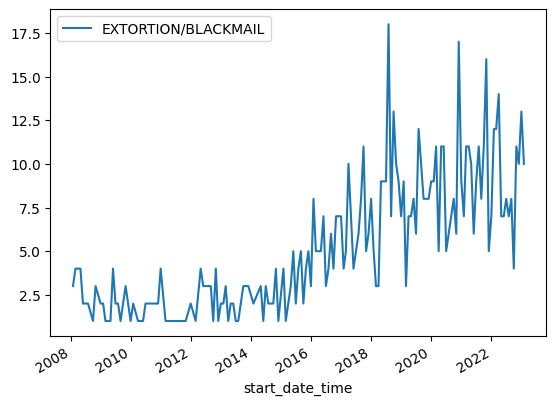

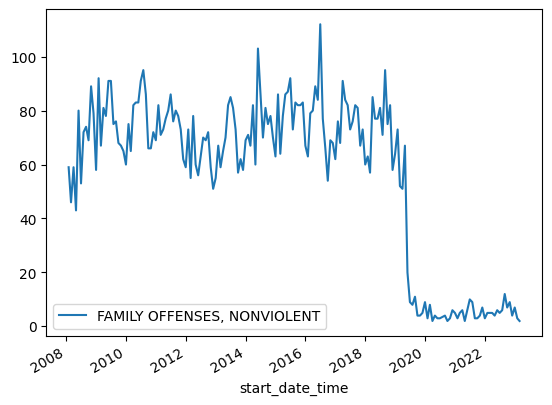

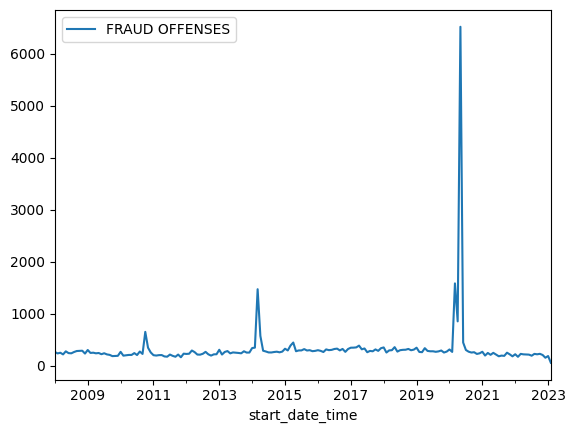

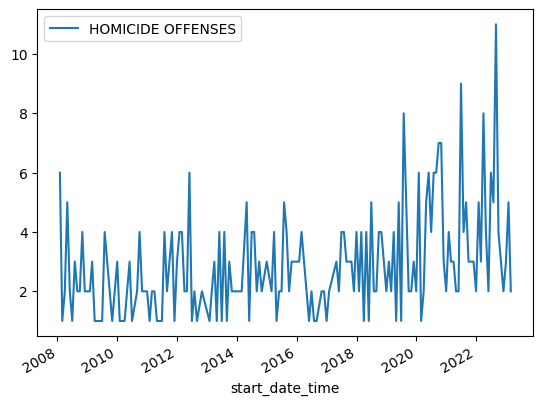

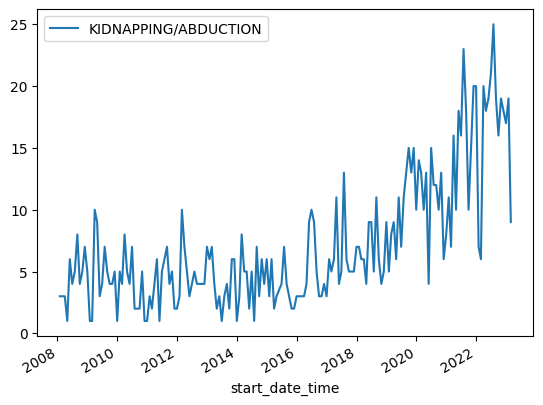

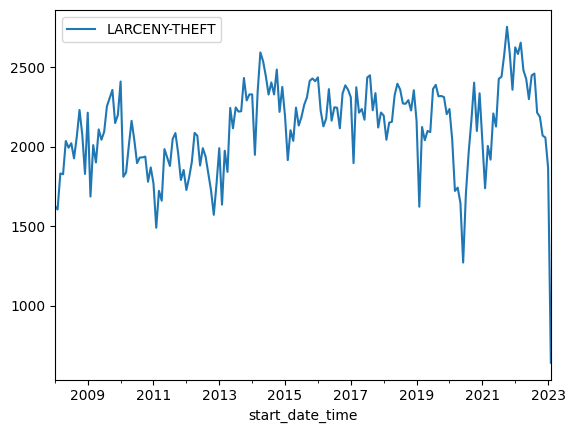

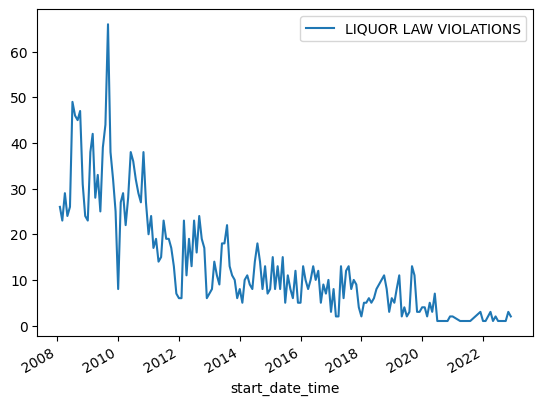

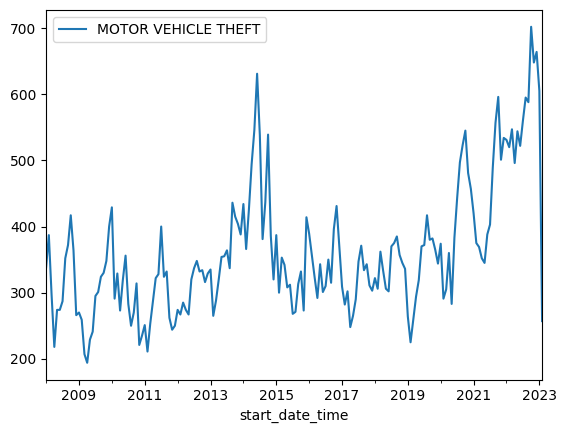

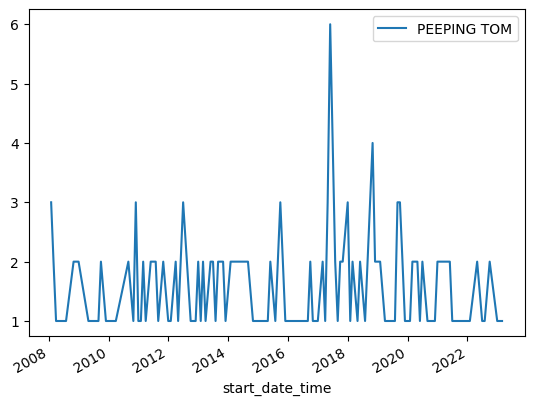

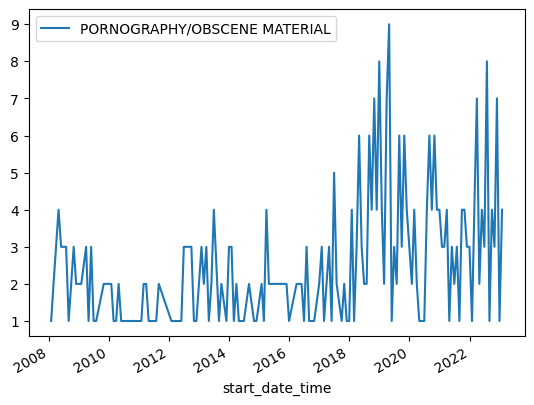

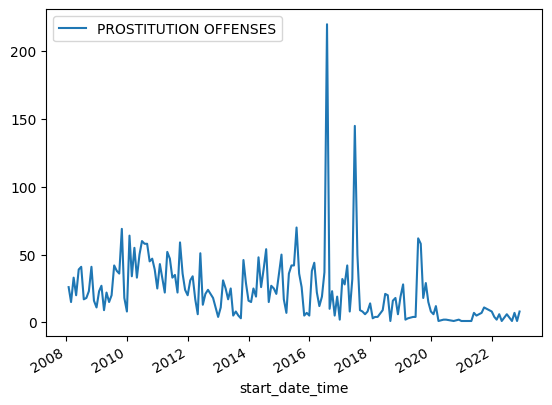

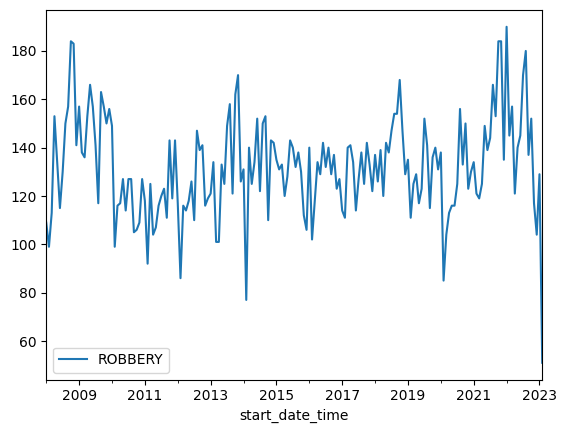

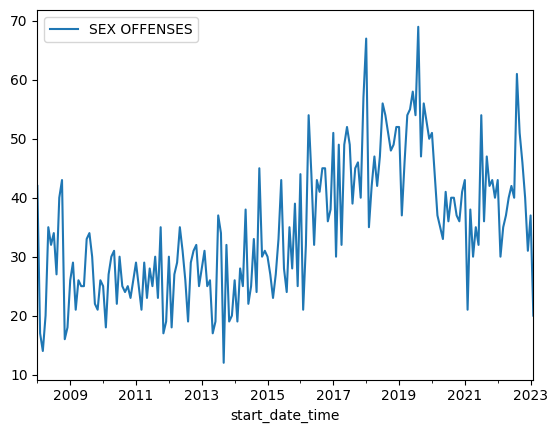

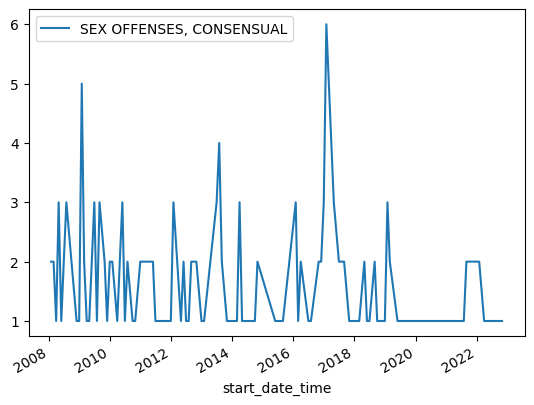

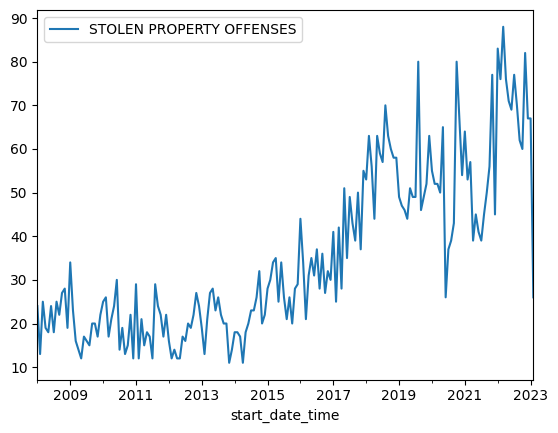

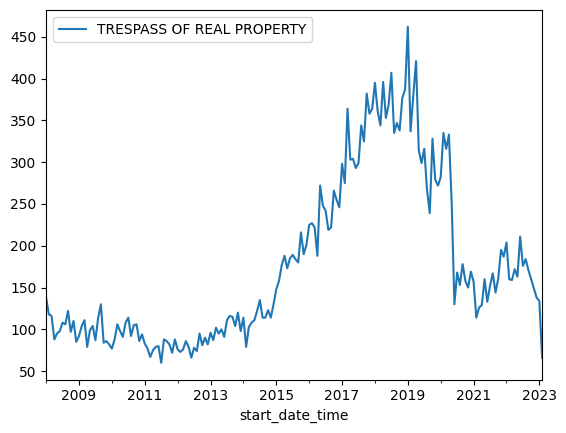

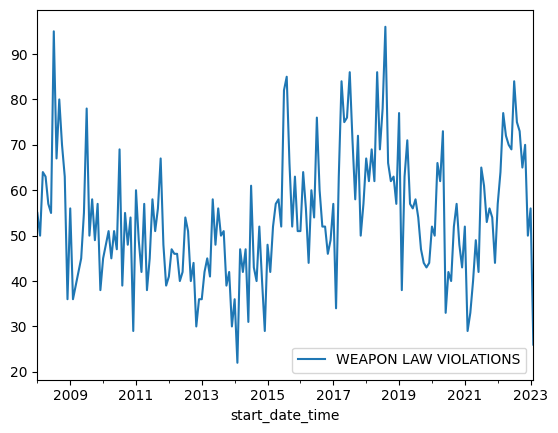

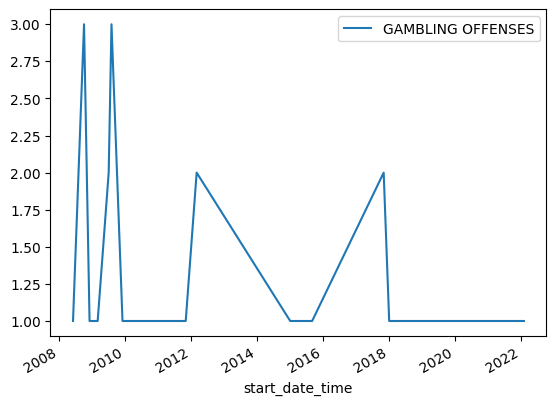

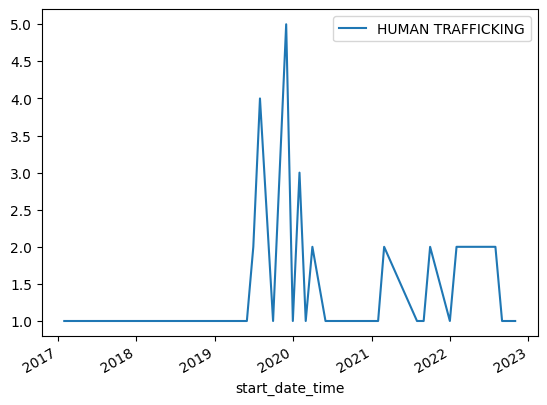

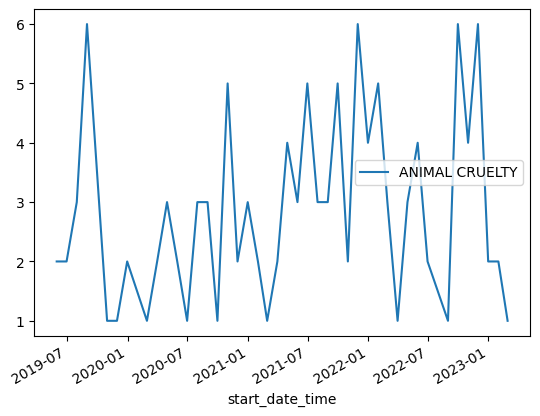

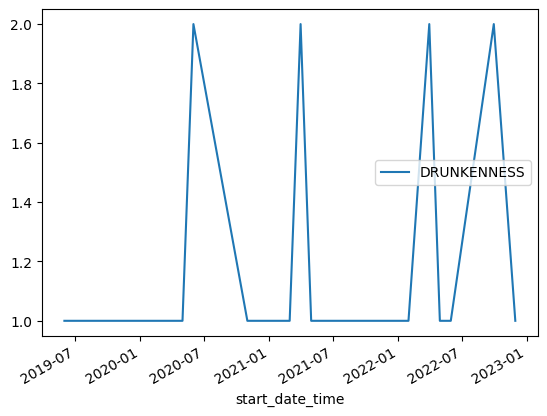

In [7]:
#Plot the data for each offense type
for offense in df3['Offense Parent Group'].unique():
    df3[df3['Offense Parent Group'] == offense].plot(x='start_date_time', y='counts', label=offense)
plt.legend()
plt.show()

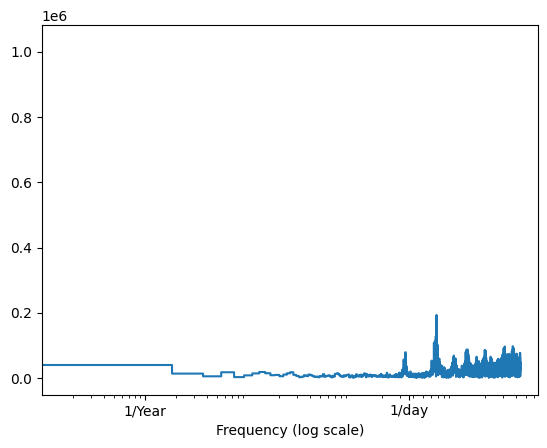

In [8]:
#ML MODEL TIME
date_time = pd.to_datetime(df3['start_date_time'], format='%m/%d/%Y %H:%M:%S %p')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

fft = tf.signal.rfft(df3['counts'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df3['counts'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

plt.show()